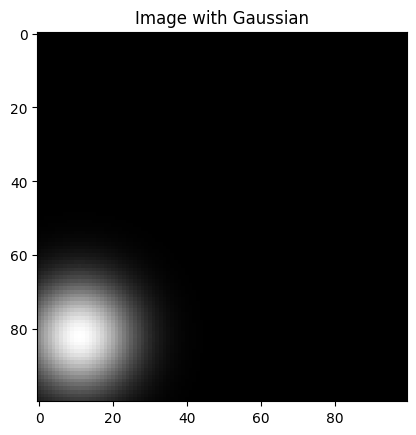

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2

# Paso1: Generar una imagen pixelada de 100x100 con fondo negro
image_size = 100
image = np.zeros((image_size, image_size))

# Aleatoriamente seleccionamos el centro para la Gaussiana
center_y = np.random.randint(0, image_size)

# Creamos la funcion Gaussiana
sigma = 10
x = np.arange(0, image_size, 1)
y = np.arange(0, image_size, 1)
x, y = np.meshgrid(x, y)
gaussian = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

# Añadimos la Gaussiana a la imagen
image += gaussian

# Mostramos la imagen
plt.imshow(image, cmap='gray')
plt.title('Image with Gaussian')
plt.show()


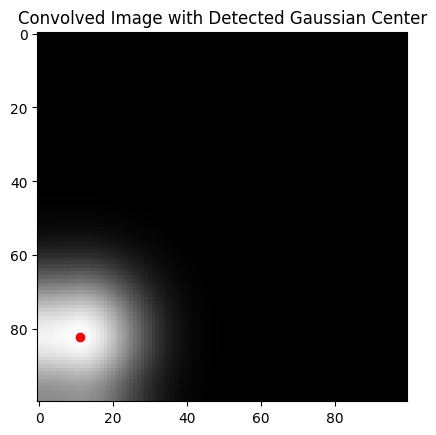

Detected Gaussian center: (11, 82), Proportionality factor A: 312.6162323436331


In [ ]:
import scipy.ndimage as ndi

# Definimos el Kernel 2D
def gaussian_kernel(size, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    d = np.sqrt(x*x + y*y)
    g = np.exp(-(d**2 / (2.0 * sigma**2)))
    return g / g.sum()

# Creamos la Gaussiana del Kernel
kernel_size = 21  # Example kernel size
kernel_sigma = 10
kernel = gaussian_kernel(kernel_size, kernel_sigma)

# Convolucion aplicada
convolved = ndi.convolve(image, kernel)

# Encontramos en punto en la convolucion
peak_y, peak_x = np.unravel_index(np.argmax(convolved), convolved.shape)

# Mostramos la imagen y detectamos el punto
plt.imshow(convolved, cmap='gray')
plt.scatter([peak_x], [peak_y], color='red')
plt.title('Convolved Image with Detected Gaussian Center')
plt.show()

# Determinamos la proporcionalidad del factor A
A = convolved[peak_y, peak_x] / kernel[kernel_size // 2, kernel_size // 2]
print(f'Detected Gaussian center: ({peak_x}, {peak_y}), Proportionality factor A: {A}')


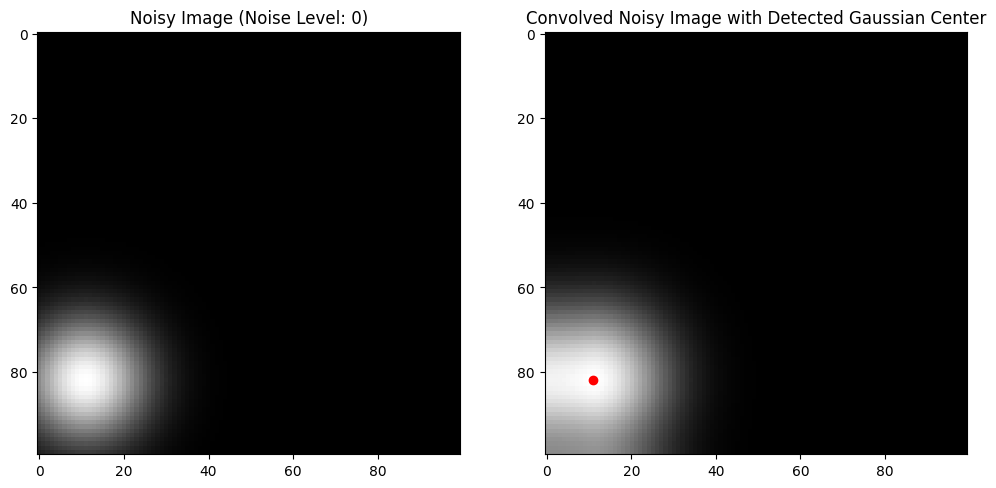

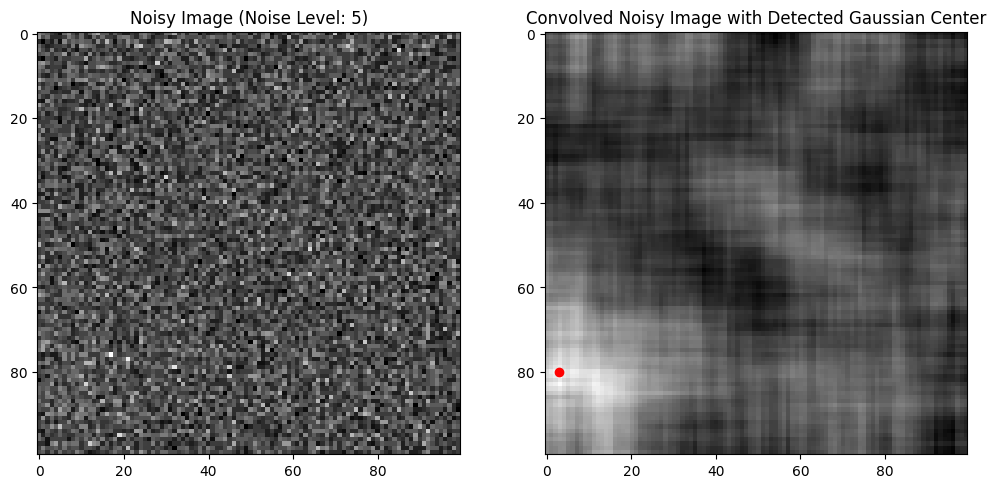

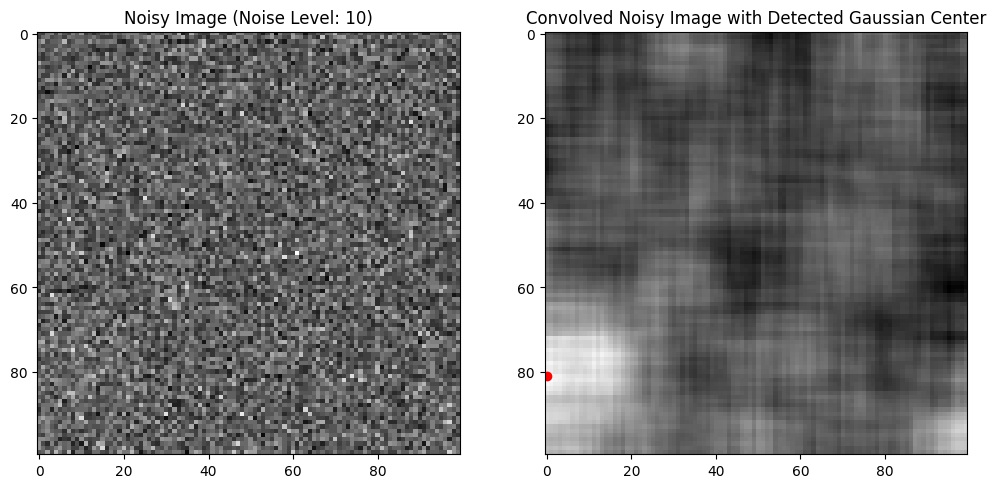

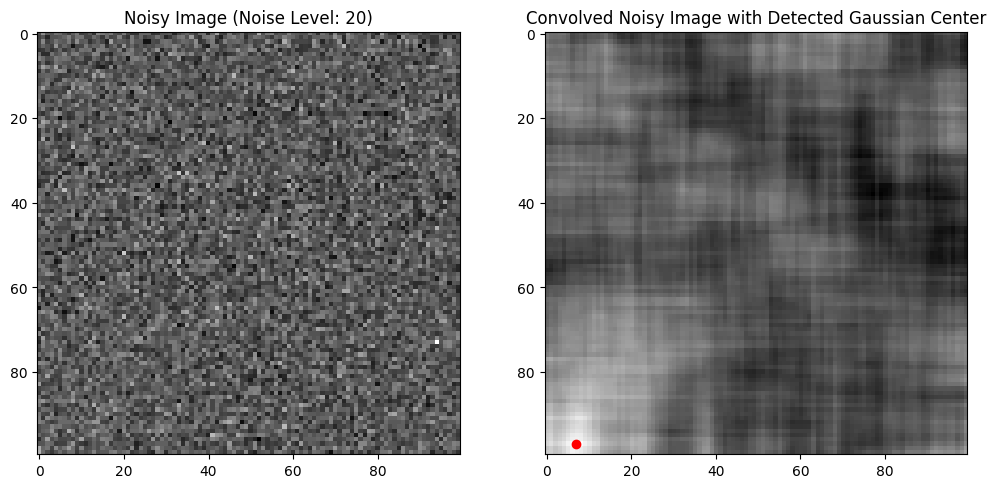

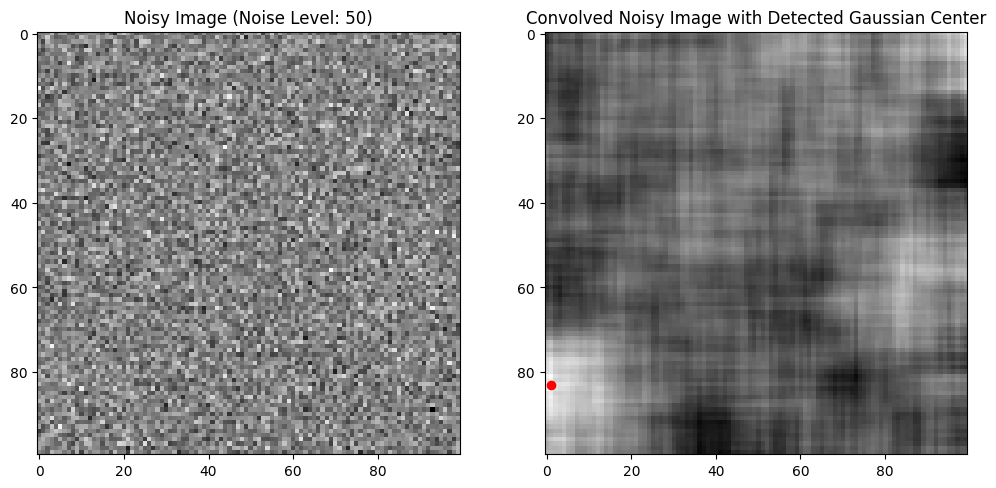

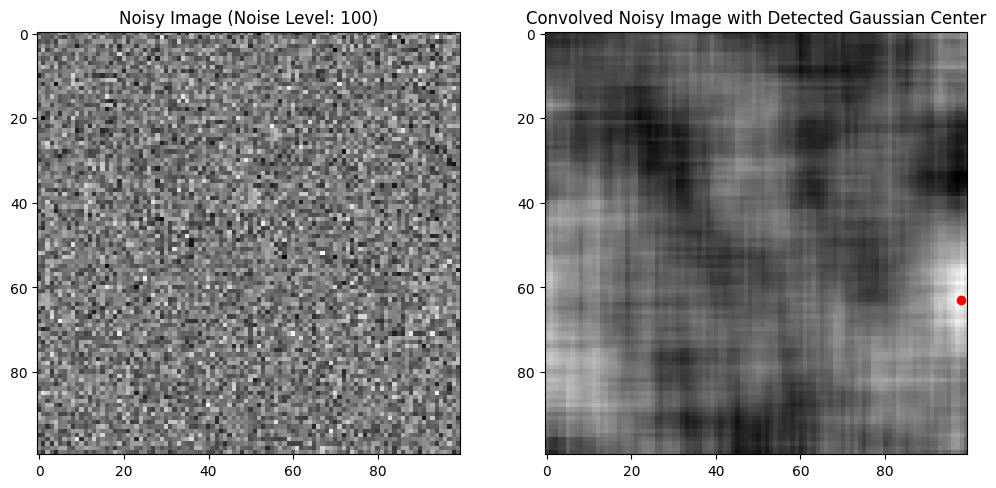

Noise Level: 0, Detected Gaussian center: (11, 82), Proportionality factor A: 312.6162323436331
Noise Level: 5, Detected Gaussian center: (3, 80), Proportionality factor A: 2552.942172535664
Noise Level: 10, Detected Gaussian center: (0, 81), Proportionality factor A: 4876.300874062977
Noise Level: 20, Detected Gaussian center: (7, 97), Proportionality factor A: 9408.861293913056
Noise Level: 50, Detected Gaussian center: (1, 83), Proportionality factor A: 22747.551878078833
Noise Level: 100, Detected Gaussian center: (98, 63), Proportionality factor A: 45210.120542564866


In [ ]:
# Funcion que elimina el ruido
def add_shot_noise(image, noise_level):
    noisy_image = image + np.random.poisson(noise_level, image.shape)
    return noisy_image

# Se generan imagenes de varios niveles para eliminar el ruido
noise_levels = [0, 5, 10, 20, 50, 100]  # Different levels of shot noise
results = []

for noise_level in noise_levels:
    noisy_image = add_shot_noise(image, noise_level)

    # Aplicamos convolucion
    convolved_noisy = ndi.convolve(noisy_image, kernel)
    peak_y_noisy, peak_x_noisy = np.unravel_index(np.argmax(convolved_noisy), convolved_noisy.shape)
    A_noisy = convolved_noisy[peak_y_noisy, peak_x_noisy] / kernel[kernel_size // 2, kernel_size // 2]

    results.append((noise_level, peak_x_noisy, peak_y_noisy, A_noisy))

    # Mostramos la imagen con el ruido
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'Noisy Image (Noise Level: {noise_level})')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved_noisy, cmap='gray')
    plt.scatter([peak_x_noisy], [peak_y_noisy], color='red')
    plt.title('Convolved Noisy Image with Detected Gaussian Center')
    plt.show()

# Mostramos resultados
for result in results:
    print(f'Noise Level: {result[0]}, Detected Gaussian center: ({result[1]}, {result[2]}), Proportionality factor A: {result[3]}')
